# Arctic Sea Ice Extent Prediction

Run this notebook to exploratory analysis, model training, and predictions.

In [1]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.filterwarnings('ignore')

from scripts.ingest import *
from scripts.analysis import *
from scripts.evalmetrics import *

## Ingestion & Cleaning

In [2]:
""" Local Import. DELETE once testing is complete. """
csv_path = 'data/training/arctic_sie_clean_20231210.csv'
df = pd.read_csv(csv_path)

In [5]:
# """ Retrieve Arctic Sea Ice Data from NSIDC """
# try:
#     df = sie_index_transformer()
# except ImportError:
#     print('----------------------')
#     print('Import ingestion functions.')
#     print('----------------------')

## Exploratory Analysis

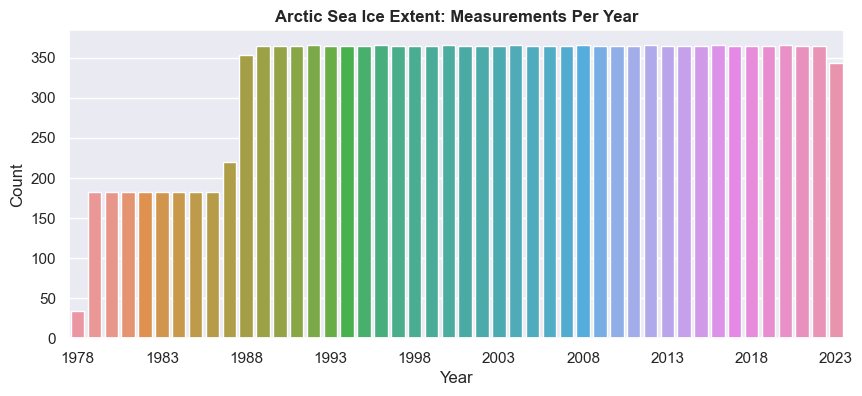

Measurements were taken approximately every 2 days from 1978 to 1987.
From 1988 to 2023, there is a daily measurement recorded, showing the recording frequency was increased two-fold.


In [6]:
""" Analyse sea ice extent measurements per year """
try:
    extent_per_year(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

### Stationarity & Seasonality

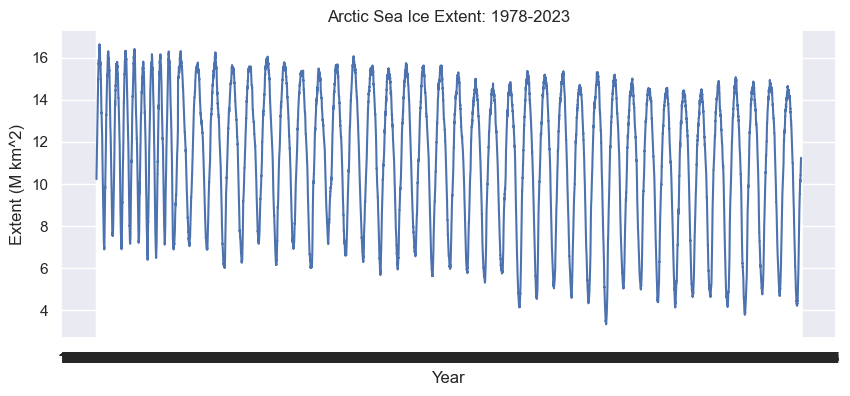

The above set is non-stationary as there are clear annual changes in sea ice extent.


In [7]:
""" Observe seasonality """
try:
    seasonality(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

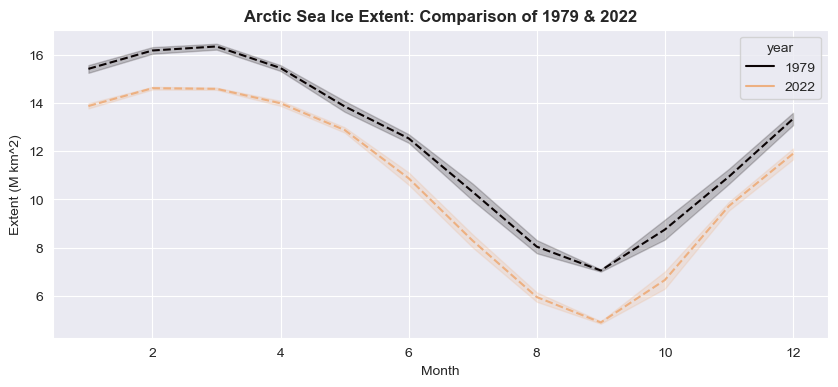

By comparing the first full and final years of the set,
we observe a decrased local maxima and mimina for the months March and September, respectively.
The year 2017 shows an approximate 2 million square kilometer decrease in sea ice extent compared to 1979.


In [6]:
""" Period Start & End Comparison  """
try:
    period_comparison(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

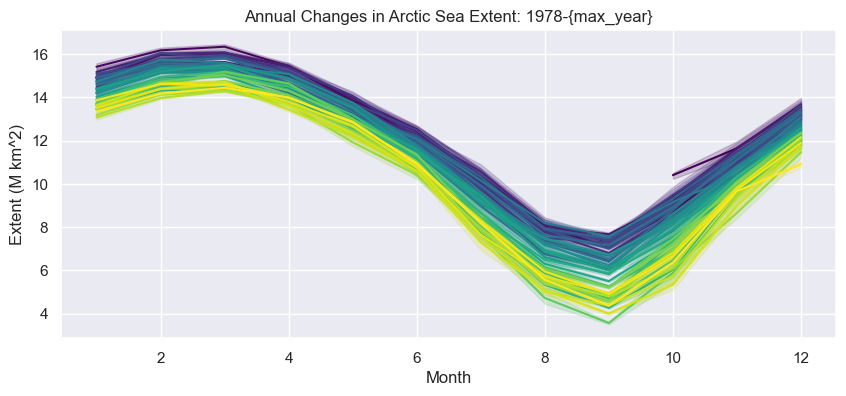

Furthermore, by including each year in the set, we observe a decrease in sea ice extent year-over-year
with darker colors representing older years and shifting to younger years as the colors brighten.


In [7]:
""" Annual Changes """
try:
    annual_changes(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

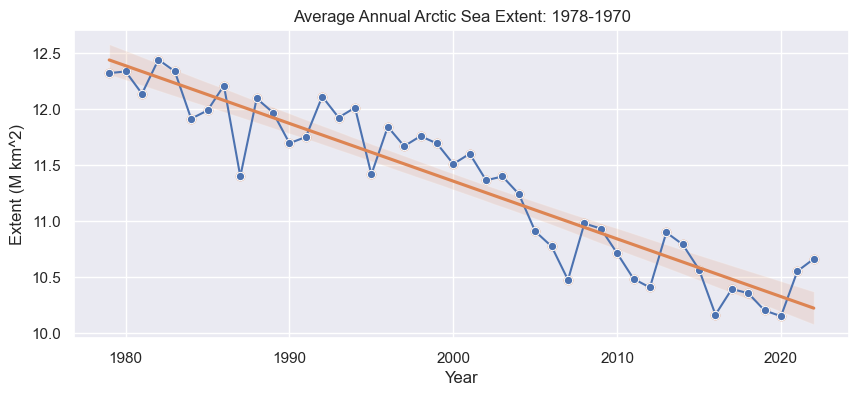

The above chart displays the average annual sea ice extent where there is a clear decreasing linear trend
as we move to more current dates.


In [8]:
""" Average Annual Sea Ice Extent """
try:
    avg_annual_sie(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

### Normality Testing

The above box plot shows a median line closer to the 75th Percentile, which indicates a negatively skewed distribution.
Additionally, no outliers are observed beyond the box plot whiskers.


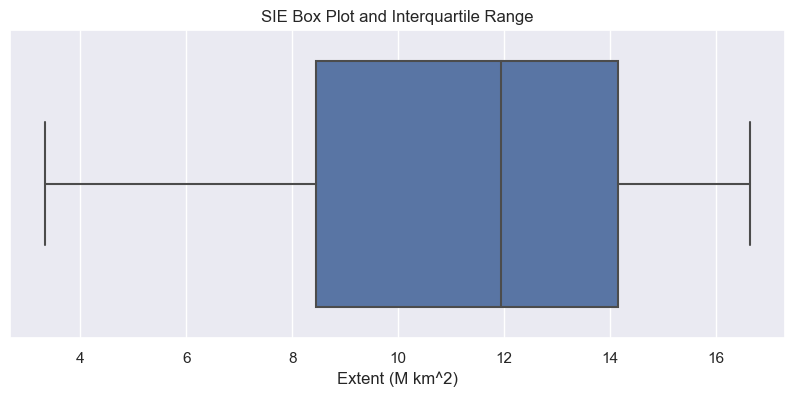

In [9]:
""" Distribution Evaluation: Boxplot """
try:
    # Boxplot
    distribution_eval(df, 'boxplot')
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

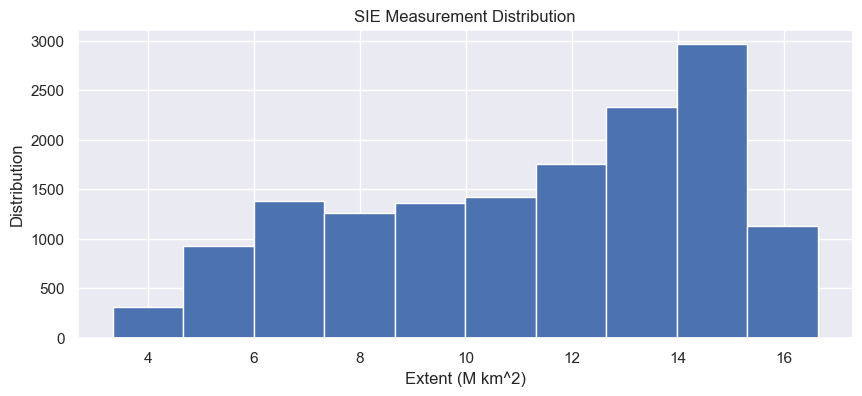

In [10]:
""" Distribution Evaluation: Histogram """
try:
    # Histogram
    distribution_eval(df, 'histogram')
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

## Partitioning & Pre-Processing